In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob

In [4]:
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [5]:
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis = 0)

df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_100.jpg,female
3,./crop_data/female\female_1002.jpg,female
4,./crop_data/female\female_1005.jpg,female


In [6]:
df.tail()

,filepath,gender
2170,./crop_data/male\male_994.jpg,male
2171,./crop_data/male\male_996.jpg,male
2172,./crop_data/male\male_997.jpg,male
2173,./crop_data/male\male_998.jpg,male
2174,./crop_data/male\male_999.jpg,male


In [7]:
df.shape

(4761, 2)

In [8]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [9]:
df['dimension'] = df['filepath'].apply(get_size)

In [10]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,182
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


In [11]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2586
male      2175
Name: count, dtype: int64

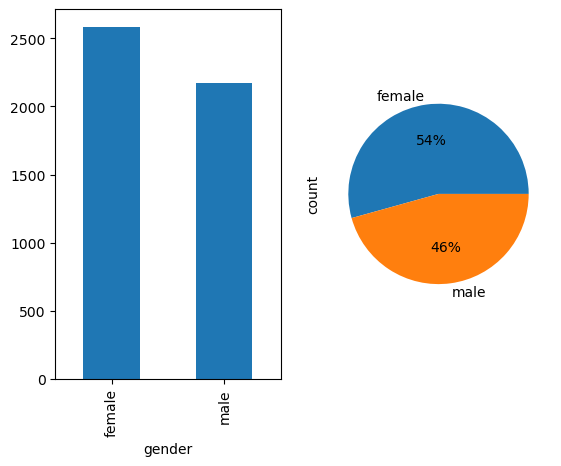

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
dist_gender.plot(kind='bar', ax = ax[0])
dist_gender.plot(kind='pie', ax = ax[1], autopct='%0.0f%%')
plt.show()

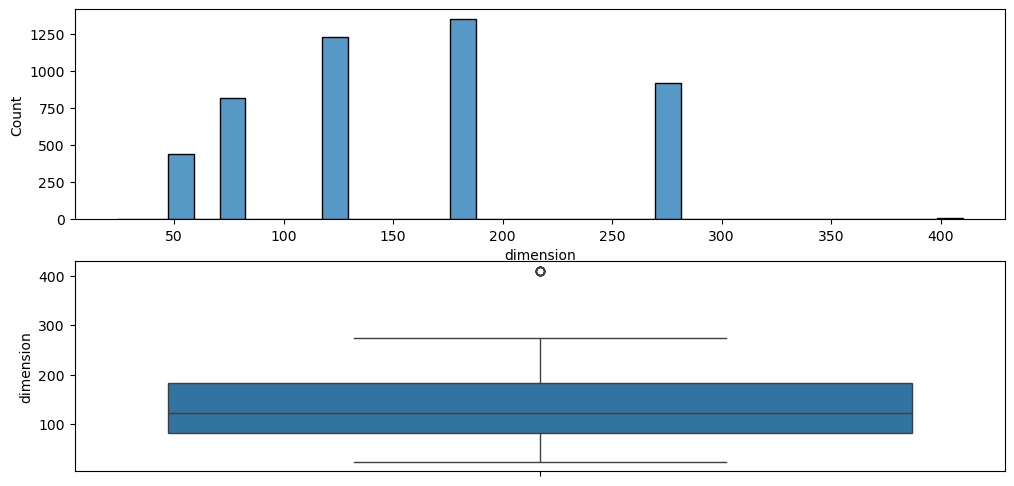

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df['dimension'])
plt.subplot(2, 1, 2)
sns.boxplot(df['dimension'])
plt.show()

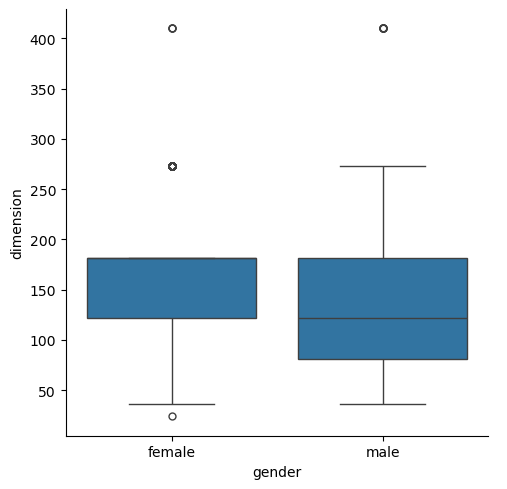

In [22]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')